# 3 Differential Equations

The key difference between difference equations and differential equations is that the former model a system in discrete time, i.e. the evolution between one point in time and the next, while the latter model a system in continuous time. This raises an important issue for simulations of such models: computers only work in discrete states (1 & 0, ultimately), so "true" continuity cannot be implemented. Hence, we have to work with approximations. Usually that creates a trade-off between accuracy (how close is the solutions to the true, e.g. analytically derived solution?) and computational efficiency (how much work does the computer  have to do, and how long is it going to take?).

In this tutorial, two different timestepping methods will be introduced:  explicit Euler method and the Runge's central difference quotient method. You will write functions to simulate the behaviour of a first-order differential equation. We can then compare the accuracy of both solutions by calculating the errors relative to the analytical solution, and also plot the behaviour of the system over time.

In [1]:
%matplotlib notebook

import numpy as np
import matplotlib.pyplot as plt

# this renders text in figures in Latex font
from matplotlib import rc
rc('text', usetex=True)

### Taylor expansion, finite differences

Differential equations are of the basic form

$\frac{\partial y}{\partial t} = y'(t) = f(y(t), t)$,

i.e. the rate of change of $y$, its time derivative, is a function of $y$ itself, and sometimes time as well. In order to simulate one time step of size $\delta$, apply a second-order Taylor expansion and rearrange in the following way:

$y(t+\delta) = y(t) + \delta y'(t) + \frac{\delta^2}{2}y''(\eta)$

$\frac{y(t+\delta) - y(t)}{\delta} = y'(t) + \frac{\delta^2}{2}y''(\eta)$

with $\eta\in[t, t+\delta]$. The difference quotient on the left-hand side converges to $y'(t)$ as $\delta\rightarrow 0$.

### Explicit Euler
The first method, the explicit Euler method, applies an approximation of this relationship in a straightforward fashion:

$\frac{y(t+\delta) - y(t)}{\delta} \approx y'(t) = f(y(t),t)$

$\Leftrightarrow y(t+\delta) \approx y(t) + \delta f(y(t), t)$

i.e. we move along the tangent line of the function at the current position. In terms of timestepping, this leads to the scheme

$y(0) = y_0$

$y(\delta) = y(0) + \delta f(y(0), 0)$

$\vdots$

$y(T) = y(T-\delta) + \delta f(y(T-\delta),T-\delta)$

There is a small error related to the higher order terms of the Taylor expansion, but the smaller $\delta$, the higher the accuracy we achieve. On the other hand, with smaller $\delta$, we need more time steps, leading to higher computational effort, as more calculations have to be performed.

##### EXERCISE

Consider the continuous-time version of the cobweb model (tutorial 3, exercise 2), leading to the first-order differential equation $p'=45 - 3p$. Implement one time step using this scheme! It should take the current price $p$, as well as the size of the timestep $\delta$ as inputs and return the estimated new price after a step of size $\delta$.

##### SOLUTION

We have the differential equation $p'=45 - 3p$. The timestepping scheme then reads

$p_{t+\delta} = p_t + \delta p' = p_t + \delta(45-3p_t) = (1-3\delta)p_t+45\delta$

In [2]:
def exp_euler_1step(p, delta):
    return p + delta * (45 - 3*p)

### Central difference quotient

Instead of applying a Taylor expansion around the point $y(t)$ to approximate $y(t+\delta)$, we can apply the Taylor expansion in the mid-point between the two, i.e. at $y(t+\frac{\delta}{2})$. In that case we obtain expressions for both $y(t)$ and $y(t+\delta)$:

$\begin{align}
    y(t) &\approx y\left(t+\frac{\delta}{2}\right) + \frac{\delta}{2}y'\left(t+\frac{\delta}{2}\right) + \frac{\delta^2}{8}y''\left(\frac{\delta}{2}\right) + \frac{\delta^3}{48}y'''(\eta_+), \hspace{0.5cm}\text{and}\\
    y(t+\delta) &\approx y\left(t+\frac{\delta}{2}\right) - \frac{\delta}{2}y'\left(t+\frac{\delta}{2}\right) + \frac{\delta^2}{8}y''\left(\frac{\delta}{2}\right) - \frac{\delta^3}{48}y'''(\eta_-)
\end{align}$

with $\eta_+\in [t, t+\frac{\delta}{2}]$ and $\eta_+\in [t+\frac{\delta}{2}, t+\delta]$.

Taking the difference of both:

$\begin{align}
    y(t+\delta) - y(t) &= \delta y'\left(t + \frac{\delta}{2}\right) +  \frac{\delta^3}{24}y'''(\eta)\\
    \frac{y(t+\delta)-y(t)}{\delta} &= y'\left(t + \frac{\delta}{2}\right) +  \frac{\delta^2}{24}y'''(\eta)
\end{align}$

with $\eta\in[t, t+\delta]$. While using the standard difference quotient (as in Euler's method) yields an error that is proportional to $\delta$, a method based on the central difference quotient will produce errors proportional to $\delta^2$, which is much smaller (considering $\delta<1$). This is the idea behind the method of Runge.

### Runge's method

Use the central difference quotient to implement a timestepping method:

$\begin{align}
    \frac{y(t+\delta)-y(t)}{\delta} &\approx y'\left(t+\frac{\delta}{2}\right)\\
    \Leftrightarrow y(t+\delta) &\approx y(t) + \delta y'\left(t+\frac{\delta}{2}\right)
\end{align}$

Of course we do not know $y\left(t+\frac{\delta}{2}\right)$, but we can simply approximate it with an explicit Euler step of size $\frac{\delta}{2}$. From the second step onwards, we can re-use the values we already calculated in the previous step.

##### EXERCISE

Implement a single step of Runge's method for the continuous-time cobweb model! You will have to calculate the midpoint state by implementing a single Euler step of size $\delta/2$ to calculate the next step. you can use the function you created above for that purpose.

In [3]:
def runge_1step(p, delta):
    p_mid = exp_euler_1step(p, delta*0.5)
    # derivative at midpoint
    dp = 45 - 3 * p_mid
    # return current price + delta times rate of change
    return p + delta * dp

### Simulation

Ultimately, we are not interested in tiny steps of a model, but longer time series and the convergence to equilibrium, or divergence to $\pm\infty$. Hence, in the next step, your task will be to implement many of those single steps in a row. Both functions for single steps are using the same structure of inputs `p` and `delta`, and an output of the price after one incremental time step, so we can write a function that can flexibly apply either timestepping method.

##### EXERCISE

Complete the function below to simulate the cobweb model. They both take an initial value `p`, the number of unit steps `T`, and the number of increments per unit step, `n`. Hint: $\delta=1/(n+1)$. They should not return a whole timeseries of values, but only the final value at time $T$. The final input is a function object, `timestep_func`. In Python (as in many other programming languages), you can pass a function as an input to another function. We do not evaluate it (no parentheses), but we apply it later in the code block of the function we are writing in the following way:

```python
def my_func(other_func, a):
    other_func(a)
```


In the same way, you can run the timestep_func with inputs `p` and `delta` inside the function that simulates a series of steps, `simulate_cobweb`.

##### SOLUTION

In [4]:
def simulate_cobweb(p, T, n, timestep_func):
    delta = 1 / n
    for t in range(n*T):
        p = timestep_func(p, delta)
    return p

In [5]:
# analytical solution
def cobweb_1period(p_0, T):
    return (p_0 - 15) * np.exp(-3*T) + 15

Below we compare the behaviour of both methods in terms of their errors and convergence towards the true value, as calculated with the analytical solution (see Tutorial). We iterate through decreasing values of $\delta\in\{2^{-2}, 2^{-3}, \dots 2^{-10}\}$, halving it every step, i.e. doubling the amount of time increments per unit time steps.

In [6]:
p0 = 60
T = 1
p_analytical = cobweb_1period(p0, T)

# errors
ee_error = 1
rg_error = 1

# analyse convergence, doubling the number of steps per time unit
for exponent in range(2,11):
    n = 2 ** exponent
    # update last period errors
    ee_last_error = ee_error
    rg_last_error = rg_error
    
    # starting prices
    p_ee = p_rg = p0
    
    # calculate solutions
    p_ee = simulate_cobweb(p_ee, T, n, exp_euler_1step)
    p_rg = simulate_cobweb(p_rg, T, n, runge_1step)
    
    # new errors
    ee_error = p_ee - p_analytical
    rg_error = p_rg - p_analytical
    
    # convergence
    print(f'delta = 1/{n}:')
    print(
        f'Explicit Euler scheme \n current value: p = {p_ee:.3e}; error = {ee_error:.3e}; error ratio = {ee_last_error / ee_error:.2e}'
    )
    print(
        f'Central difference scheme \n current value: p = {p_rg:.3e}; error = {rg_error:.3e}; error ratio = {rg_last_error / rg_error:.2e}'
    )
    print('\n')

delta = 1/4:
Explicit Euler scheme 
 current value: p = 1.518e+01; error = -2.065e+00; error ratio = -4.84e-01
Central difference scheme 
 current value: p = 1.858e+01; error = 1.344e+00; error ratio = 7.44e-01


delta = 1/8:
Explicit Euler scheme 
 current value: p = 1.605e+01; error = -1.193e+00; error ratio = 1.73e+00
Central difference scheme 
 current value: p = 1.746e+01; error = 2.180e-01; error ratio = 6.17e+00


delta = 1/16:
Explicit Euler scheme 
 current value: p = 1.662e+01; error = -6.172e-01; error ratio = 1.93e+00
Central difference scheme 
 current value: p = 1.729e+01; error = 4.579e-02; error ratio = 4.76e+00


delta = 1/32:
Explicit Euler scheme 
 current value: p = 1.693e+01; error = -3.122e-01; error ratio = 1.98e+00
Central difference scheme 
 current value: p = 1.725e+01; error = 1.059e-02; error ratio = 4.32e+00


delta = 1/64:
Explicit Euler scheme 
 current value: p = 1.708e+01; error = -1.569e-01; error ratio = 1.99e+00
Central difference scheme 
 current va

If you look at the output of this code, you will notice that the errors decrease much faster for the Runge method, i.e. the method converges to the true value faster. By halving $\delta$, we can also cut the errors in half if we use the Eueler scheme, but we make it four times smaller using the Runge method. That is because the convergence is quadratic instead of linear. We perform twice as many computationally steps per time increment $\delta$ because we have to compute the midpoint, but because of the faster convergence, we still reach the same level of accuracy with lower computational cost. The error of the standard difference method at $\delta = 1/1024$ is approximately 0.001, which has been approximately reached at $\delta =1/64$ with the central differences method!

### A note on higher-order equations

In this tutorial, we are only dealing with a model based on a single first-order differential equation. The timestepping methods here are ideal for this, and instead of extending them to higher-order equations, we will transform those into systems of first-order equations, which are going to be the topic of the next tutorial.

### Simulating time series

In the last simulation exercise, we were only interested in calculating the value of the state variable $p$ after a number of time steps $T$. Often, we are however interested in the time series of the model, starting from a given initial value. To practice the two timestepping schemes a bit more, we will introduce a different first-order differential equation, simulate it over time, and finally plot the result.

##### EXERCISE

Consider the equation $y' + 3y = 2$. Complete all the functions below: single incremental steps using the Euler and Runge methods, and a function that can apply either of these methods to simulate a time series (the output should be of type `list`) for a given number of time steps. 

In [7]:
def ee_1step(y, delta):
    return (1 - 3 * delta) * y + 2 * delta

In [8]:
def runge_1step(y, delta):
    y_mid = ee_1step(y, 0.5*delta)
    return y + delta * (2 - 3 * y_mid)

In [9]:
def simulate(y0, T, n, timestep_func):
    delta = 1 / n
    results = list()
    results.append(y0)
    for t in range(n*T):
        results.append(timestep_func(results[-1], delta))
    return results

Below, we simulate the model for 3 steps from initial value 5, using a relatively large increment $\delta=1/4$, and then we plot the results.

In [10]:
y0 = 5
T = 3
n = 4

# results using Euler
ee_res = simulate(y0, T, n, ee_1step)
# results using Runge
rg_res = simulate(y0, T, n, runge_1step)

<IPython.core.display.Javascript object>


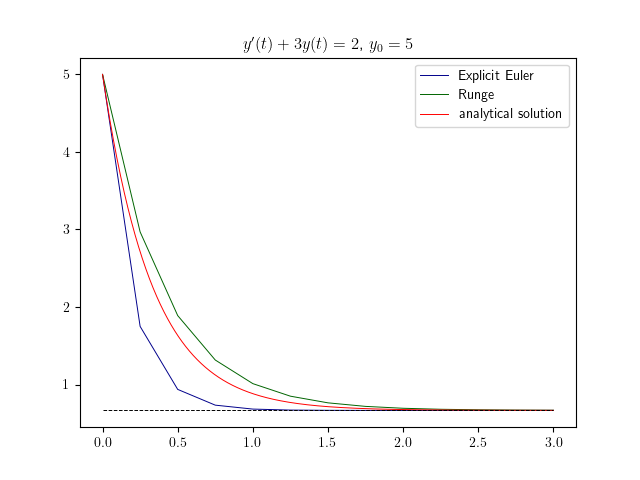

In [11]:
plt.figure()
plt.title("$y'(t) + 3y(t) = 2$, $y_0=5$")

# values for the x-axis
x = np.linspace(0, T, T*n+1)

# plot the exact solution too
A = y0 - (2/3)
x_exact = np.linspace(0, T, 1000) # more points for a smoother curve
y_exact = A * np.exp(-3 * x_exact) + (2/3)

plt.plot(x, ee_res, label="Explicit Euler", lw=0.7, c="darkblue")
plt.plot(x, rg_res, label="Runge", lw=0.7, c="darkgreen")
plt.plot(x_exact, y_exact, label="analytical solution", lw=0.7, c='red')

plt.hlines(2/3, 0, T, color='black', lw=0.7, ls='--')

plt.legend()

Note how the distance from the green (upper) line to the exact solution (red line in the middle) is much smaller than the distance of the Euler method to the analytical solution. Moreover, you can clearly see another property of the Euler method: In the case of a convex function $\frac{\partial^2}{\partial t^2}>0$ as the present one, the slope is exaggerated, i.e. in the case of a positive (negative) coefficient, we would obtain a positive (negative) bias. We only approximate the slope at the current point and and take a step $dt=\delta$ along this slope. However, the slope is changing (non-zero second derivative, i.e. the rate of change is changing), and therefore at any point between $t$ and $t+\delta$, the slope would already be different, which we ignore, leading to small approximation errors. The central difference methodobtains a more accurate representation of the true behaviour of the system, as it applies the slope in the middle, which is closer to the average slope over the entire distance.

You can play around with the values of $n, \delta$ and see how they change the behaviour of the approximation. For values $n>10$ it the difference between Runge's method and the exact solution quickly become invisible, while it takes a bit longer with the EUler method. You might also note a curious error source for $n\leq2$, which we will address in the next tutorial.